<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## RNN one-to-many

#### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes RNN. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/)

In [1]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
from keras.layers import Bidirectional

In [2]:
# Generar datos sintéticos
X = list()
y = list()

# X es una lista de números de 1 al 43 que avanzan de 3 en 3
X = [x for x in range(1, 44, 3)]

# "y" (target) se obtiene como por cada dato de entrada se
# se obtienen dos datos de salida como x+1 y x+2
y = [ [x+1, x+2] for x in X]

print("datos X:", X)
print("datos y:", y)

datos X: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
datos y: [[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


In [3]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), 1, 1)
print("datos X:", X)

datos X: [[[ 1]]

 [[ 4]]

 [[ 7]]

 [[10]]

 [[13]]

 [[16]]

 [[19]]

 [[22]]

 [[25]]

 [[28]]

 [[31]]

 [[34]]

 [[37]]

 [[40]]

 [[43]]]


In [4]:
y = np.asanyarray(y)
y.shape

(15, 2)

In [16]:
X.shape

(15, 1, 1)

### 2 - Entrenar el modelo

In [18]:
input_shape = X[0].shape
input_shape

(1, 1)

In [17]:
output_shape = y.shape[1]
output_shape

2

In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=input_shape))
model.add(Dense(output_shape))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17026 (66.51 KB)
Trainable params: 17026 (66.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 2s 155ms/step - loss: 467.5012 - val_loss: 1687.2125
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 461.2640 - val_loss: 1665.9730
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 456.6370 - val_loss: 1644.4552
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 451.7243 - val_loss: 1622.6495
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 445.2462 - val_loss: 1600.9437
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 440.3826 - val_loss: 1577.7256
Epoch 7/500
3/3 [==============================] - 0s 16ms/step - loss: 434.2627 - val_loss: 1554.1885
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 427.5681 - val_loss: 1529.8149
Epoch 9/500
3/3 [==============================] - 0s 15ms/step - loss: 421.6500 - val_loss: 1503.5317
Epoch 10/500
3/3 [==============================] - 0s 14ms/step - loss:

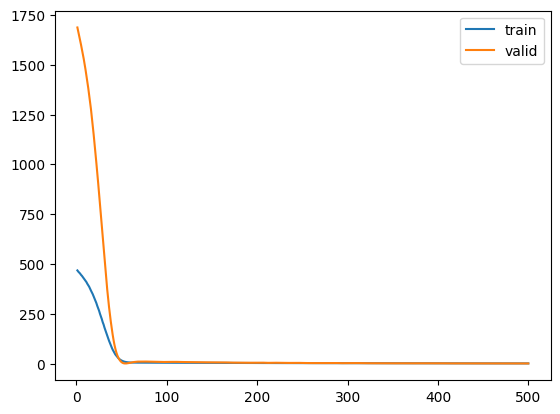

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [10]:
# Ensayo
x_test = 10
y_test = [x_test + 1, x_test + 2]
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model.evaluate(test_input, np.array([y_test]))

y_test: [11, 12]
y_hat: [10.259566 10.893359]
1/1 [==============================] - 0s 42ms/step - loss: 0.8864


0.8864479064941406

### 3 - Multi-layer RNN

In [19]:
# En esta oportunidad se utilizarán dos layer LSTM. Para poder conectar
# la primera layer con la segunda se debe colocar return_sequences=True

model2 = Sequential()
model2.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
model2.add(LSTM(64, activation='relu'))
model2.add(Dense(output_shape))
model2.compile(loss='mse',
              optimizer="Adam")

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 64)             16896     
                                                                 
 lstm_10 (LSTM)              (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 50050 (195.51 KB)
Trainable params: 50050 (195.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
hist2 = model2.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 3s 206ms/step - loss: 466.7881 - val_loss: 1713.5992
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 464.9895 - val_loss: 1707.1693
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 463.4344 - val_loss: 1700.1572
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 462.0060 - val_loss: 1692.5405
Epoch 5/500
3/3 [==============================] - 0s 37ms/step - loss: 459.9747 - val_loss: 1684.0702
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 457.9557 - val_loss: 1673.7975
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 455.1369 - val_loss: 1661.0463
Epoch 8/500
3/3 [==============================] - 0s 15ms/step - loss: 451.9717 - val_loss: 1644.4980
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 447.6431 - val_loss: 1623.2695
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss:

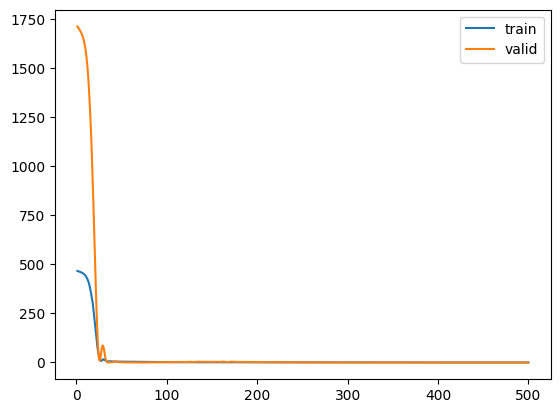

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist2.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist2.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist2.history['val_loss'], label='valid')
plt.show()

In [22]:
# Ensayo
x_test = 10
y_test = [x_test + 1, x_test + 2]
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model2.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model2.evaluate(test_input, np.array([y_test]))

y_test: [11, 12]
y_hat: [10.9695835 11.922775 ]
1/1 [==============================] - 0s 26ms/step - loss: 0.0034


0.0034444108605384827

### 4 - Conclusión
La unica diferencia que se debe tener en cuenta cuando hay más de una salida es que la cantidad de neuronas de la última capa debe coincidir con el tamaño de la secuencia de salida.
En este ejemplo, donde el problema es más complejo, hubo una diferencia apreciable entre utilizar una sola capa o varias LSTM.